# Classic linear SVM classifier

In [4]:
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import pydicom


In [5]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

CATEGORIES = ['MALIGNANT', 'BENIGN']
datadir = r"D:\Other\IFN646_Project\mixed_dataset"  # The dataset contains grayscale images

IMG_SIZE = 120  # Common size for all images

training_data = []

for category in CATEGORIES:
    path = os.path.join(datadir, category)
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)  # Read the image in grayscale
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            training_data.append([new_array, class_num])
        except Exception as e:
            pass

print('Number of images: ' + str(len(training_data)))

## Create input variables
X = []
y = []
for image, label in training_data:
    X.append(image)
    y.append(label)

X = np.array(X).reshape(len(training_data), -1)  # Flatten the images to 1D

print("Vector X: " + str(X.shape))
# Normalize the images
X = X / 255.0

Number of images: 373
Vector X: (373, 14400)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

svc = SVC()

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear'],
    'gamma': ['scale', 'auto', 0.1, 1]
}

grid_search = GridSearchCV(svc, param_grid, scoring='accuracy', cv=5)

grid_search.fit(X_train, y_train)  

print("Best parameters : ", grid_search.best_params_)
print("Best accuracy : ", grid_search.best_score_)



In [ ]:
print(X.shape)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.svm import SVC
svc = SVC(kernel='linear', gamma='scale')  
svc.fit(X_train, y_train)

y_test_pred = svc.predict(X_test)
y_train_pred = svc.predict(X_train)

from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test, y_test_pred))

print("Test Accuracy on data is", accuracy_score(y_test, y_test_pred))
print("Train Accuracy on data is", accuracy_score(y_train, y_train_pred))


Accuracy on unknown data is

              precision    recall  f1-score   support

           0       0.68      0.49      0.57        39
           1       0.57      0.75      0.65        36

    accuracy                           0.61        75
   macro avg       0.63      0.62      0.61        75
weighted avg       0.63      0.61      0.61        75

Test Accuracy on data is 0.6133333333333333
Train Accuracy on data is 0.9966442953020134


In [ ]:
print(svc.get_params())

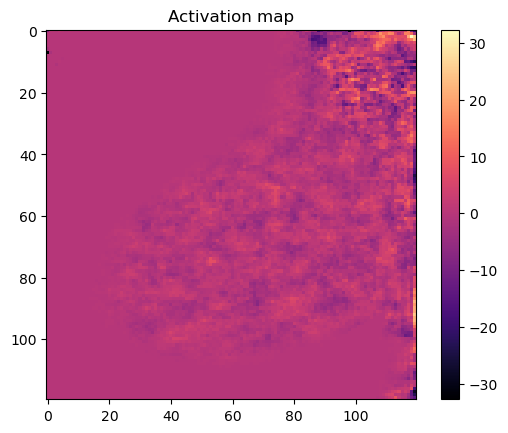

In [6]:
## Visualise results and interprete SVM

# One image as example
original_image = cv2.imread("D:\\Other\\IFN646_Project\\mixed_dataset\\MALIGNANT\\251.jpg")

resized_image = cv2.resize(original_image, (IMG_SIZE, IMG_SIZE))
grey_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

# Flatten the image to a 1D array
image_features = grey_image.reshape(1, -1)

# Get the weights
# svm_weights = svc.dual_coef_
svm_weights = svc.coef_[0]

# Apply the weights
activation_map = image_features * svm_weights

# Reshape the activation map to the original image shape
activation_map = activation_map.reshape(grey_image.shape)

# Activation map
plt.imshow(activation_map, cmap='magma')
plt.title('Activation map')
plt.colorbar()
plt.show()

As the model is not accurate, the activation map here for a MALIGNANT image shows that the model is not able to identify specific regions.

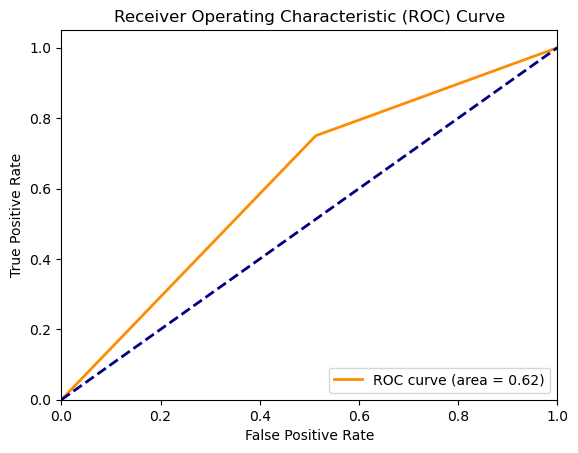

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### 